# Operare *sul posto* con le liste

*(Sezioni 6.3 e 6.4 del libro di testo)*

In generale, quasi tutte le operazioni che creano o modificano una lista si possono implementare in due modi:
  * operazioni che restituiscono una nuova lista senza modificare i parametri (come fatto fin'ora);
  * operazioni che modificano una lista data come parametro in input (come vedremo adesso): si dice che le funzioni operano **sul posto**.

Nel caso di operazioni su stringhe il secondo approccio è impossibile perché le stringhe sono tipi immutabili. Mettiamo adesso a confronto questi due approcci.

## Un caso di studio: moltiplicare tutti gli elementi di una lista per lo stesso valore

### Implementazione che restituisce una nuova lista

**Problema: scrivere una funzione `multiply(l,n)` che restituisce una nuova lista formata moltiplicando gli elementi di `l` per `n`**.

Ad esempio:
  * `multiply([1, 2, 3], 5)` restituisce `[5, 10, 15]`
  * `multiply([1, 2, 3], 0)` restituisce `[0, 0, 0]`

Al solito, possiamo usare  lo schema in cui si parte da una lista vuota e su aggiungono elementi uno alla volta, o quello in cui si crea già la lista risultato della lunghezza giusta e poi si rimpiazzano gli elementi con i valori corretti. Vediamo una soluzione basata sul secondo schema, perché il codice è più vicino a quello che vedremo dopo che effettua la modifica sul posto.

In [1]:
def multiply(l, n):
    """
    Restituisce la lista ottenuta moltiplicando tutti gli elementi di l per n.
    """
    res = [None] * len(l)
    for i in range(len(l)):
        res[i] = l[i] * n
    return res

In [13]:
multiply([1, 2, 3],5)

[5, 10, 15]

### Implementazione che opera sul posto

Vediamo adesso il secondo approccio, che è quello di scrivere una funzione che *non restituisce* una nuova lista, ma cambia direttamente la lista fornita come parametro.  È la stessa modalità con cui operano i metodi come `append`, `extend`, `remove`, etc... del tipo `list`.

**Problema: scrivere una funzione `multiply_inplace(l,n)` che non resitutisce nulla, ma modifica la lista l moltiplicando tutti i suoi elemento per n**

Ad esempio:
  * se `lista` è `[1,2,3]` e chiamo la funzione `multiply_inplace(lista, 5)`, `lista` verrà modificata in `[5, 10, 15]`

Attenzione che i due schemi che abbiamo visto nelle lezione precedenti per generare una nuova lista (partire dalla lista vuota e riempirla con `append`, o partire da una stringa della giusta lunghezza e rimpiazzare gli elementi) sono due modi diversi di implementare esattamente la stessa funzione. Una delle implementazioni può essere sosituito con l'altro senza dover cambiare nulla nel programma che la usa. Qui invece quello che vogliamo implementare è una funzione leggermente diversa. Se un programma usa la funzione `multiply`, non possiamo semplicmente cambiare il codice con quello di `multiply_inplace`, perché il programma non funzionerebbe.

Il codice di `multiply_inplace` è molto simile a quello di `multiply` visto sopra, anzi, più semplice.

In [2]:
def multiply_inplace(l, n):
    """
    Moltiplica tutti gli elemento di l per n.
    """
    for i in range(len(l)):
        l[i] = l[i] * n   # oppure, l[i] *= n

In [3]:
lista = [1,2,3]
multiply_inplace(lista, 5)

Sembra non sia successo nulla, nessun valore viene restituito, ma `lista` è cambiata.

In [ ]:
lista

[5, 10, 15]

Questo succede perché quando invoco una funzione, il legame tra parametri formali e argomenti equivale ad una operazione di assegnazione. Quindi nella chiamata `multiply_inplace(lista, 5)`, la variabile local `l` diventa un alias di `lista`, mentre la variabile `n` punterà ad un oggetto di valore `5`.

### Esecuzione passo-passo di `multiply_inplace`

Consideriamo il seguente programma:

In [10]:
def multiply_inplace(l, n):
    for i in range(len(l)):
        l[i] *= n

k = [1, 2, 3]
m = k
multiply_inplace(k, 5)
print(k)

[5, 10, 15]


Questa è la sua esecuzione passo-passo.

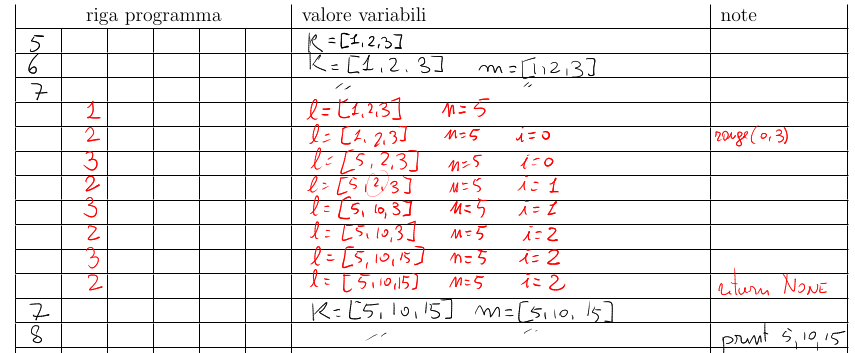

Notare che poiché `l`, `m` e `k` sono tutti alias, le modifiche ad `l` avvenute all'interno della funzione `multiply_inplace` si riflettono sulle variabili `m` e `k` del programma principale. 

Poiché vogliamo evidenziare con più precisione il contenuto di heap e stack, procederemo adesso ad esaminare il loro contenuto dopo ogno passo. Dopo l'ecuzione delle righe 5 e 6, questa è la situazione:

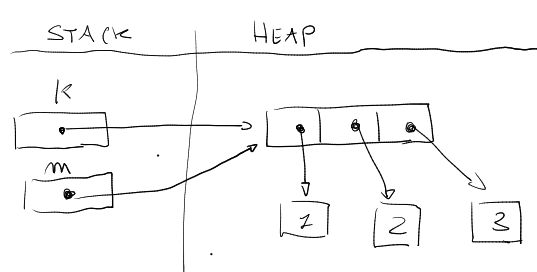

Notare che:
* `m` e `k` si riferiscono allo stesso oggetto;
* siamo stati particolarmente pedanti, e invece di mettere 1, 2 e 3 dentro la lista `l`, abbiamo più correttamente inserito dentro la lista dei riferimenti (frecce) a tre zone nello heap che contengono i numeri 1, 2 e 3 rispettivamente. Tale precisione è eccessiva quando si ha a che fare con i tipi immutabili, ma per una volta abbiamo voluto fare tutto con la massima precisione.



Alla riga 7 c'è la chiamata di funzione. Quello che succede è che:

* Nello stack viene creata una nuova zona dedicata alle variabili locali: questa zona si chiama *record di attivazione*.
* Il riferimento presente nell'argomento `m` viene copiato nel paramatro `m`. Il risultato è che `l` punta allo stesso oggetto nello heap di `m` (in sostanza, è come se fosse stato eseguito l'assegnamento `l = m`).
* Viene creato un oggetto contenente il numero 5 e viene assegnato alla variabile `n`.

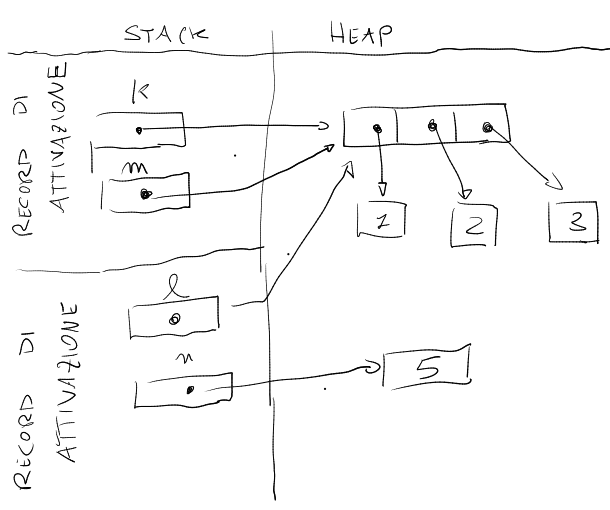



Quando si arriva alla riga 2 viene creata una nuova variabile locale `i`, che inizialmente conterrà il valore 0 (successivamente verrà incrementata a 1 e 2, visto che `range(l)=3`).

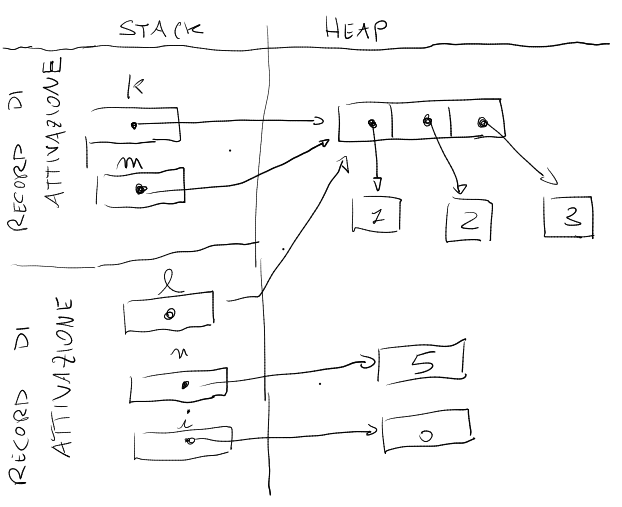

Alla riga 3, viene preso valutata l'espressione `l[i] * n`. In generale, l'esecuzione di una operazione crea un nuovo oggetto del valore correto nell'heap, in questo caso un intero del valore di `5`. Il riferimento di questo ogggetto viene messo nella posizione 0 della lista (in realtà, per motivi di ottimizzazione l'implementazione standard di Python in questo caso specifico riutilizzerebbe il 5 che abbiamo già nell'heap, ma qui facciamo finta che questa ottimizzazione non esista).

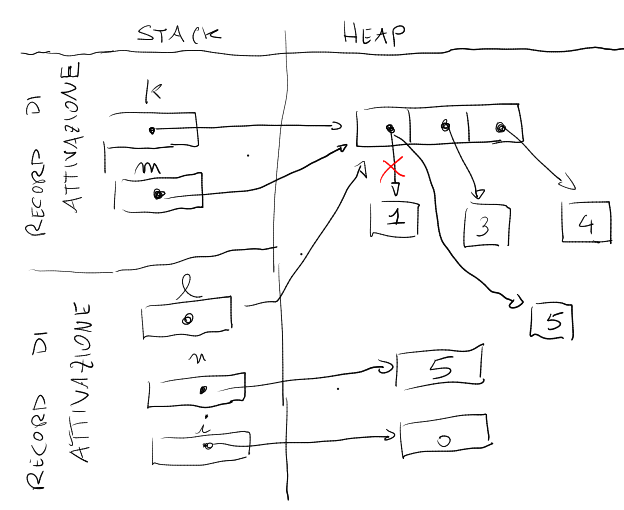

L'oggetto `1` rimane nell'heap, ma non è più raggiungibile in nessun modo. Verrà cancellato da Python durante un processo periodico chiamato *garbage collection*. Ho indicato con una X rossa il vecchio riferimento tra la prima posizione della lista e l'oggetto `2`. Questo è però solo a scopo didattico, Python non tiene traccia in alcun modo dei riferimento vecchi ma solo di quelli correnti.

Si torna alla riga 2, che rimpiazza il valore di `i` con 1.

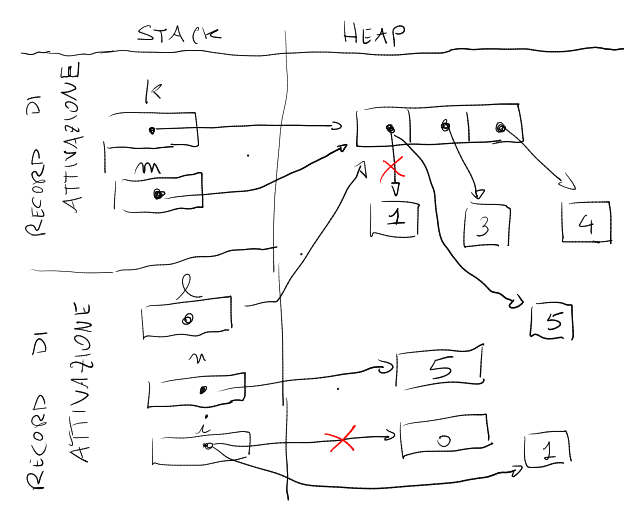

Si procede in questo modo fino alla fine della funzione, in cui stack ed heap hanno raggiunto questa situazione.

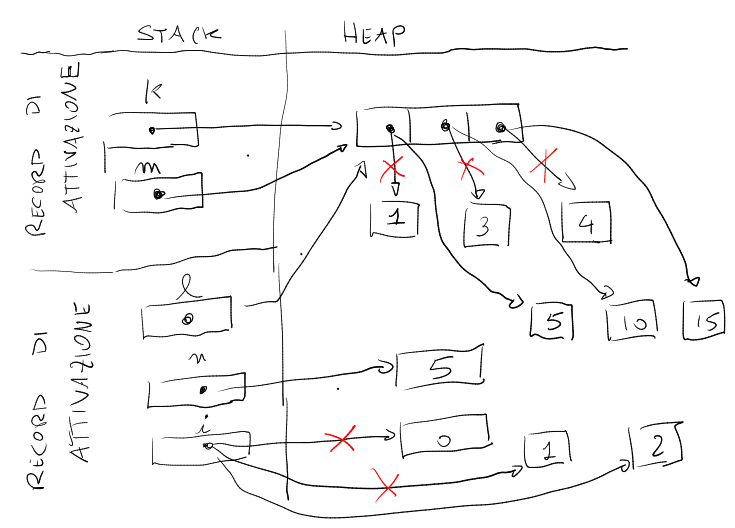

A questo punto la funzione termina. Tutto quello che c'è nel suo record di dattivazione sparisce, ma l'heap non subisce alcuna modifica. Ci saranno quindi numerosi oggetti irraggiungibili che, come detto, verranno cancellati dal processo di *garbage collection*.

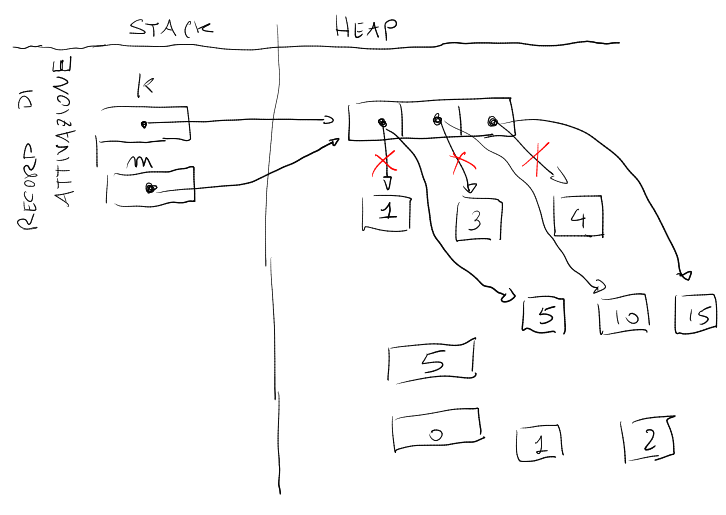

A questo punto alla riga 8 viene stampato il contenuto della lista `k`, ovvero `[1,2,3]`.

## Un altro esempio: riempimento sul posto

Vediamo un altro esempio di questo doppio approccio. Nella lezione sulle liste abbiamo visto una funzione che genera una lista con lunghezza data, e tutti gli elementi posti uguali ad un valore fissato. Riporto il codice qui sotto, nella versione che crea la lista iniziale della dimensione giusta.

In [ ]:
def fill2(n, v):
    """
    Restituisce una lista di lunghezza n riempita con il valore v.
    """
    risultato = [None] * n
    for i in range(n):
        risultato[i] = v
    return risultato

Una variante che opera *sul posto* potrebbe essere la seguente:

In [6]:
def fill_inplace(l, v):
    """
    Sostituisce tutti gli elementi di l con il valore v.
    """
    for i in range(len(l)):
        l[i] = v

In questo caso parto da una lista `l` già esistente, chiamo `fill_inplace(l, v)` e mi ritrovo tutti gli elementi di `l` rimpiazzati con `v`.

In [7]:
l = [1,2,3]
fill_inplace(l, "ciao")

In [8]:
l

['ciao', 'ciao', 'ciao']


 Voglio precisare che io in queste lezioni uso spesso terminare il nome delle funzioni del 2° tipo con `_inplace`, ma questo serve solo a scopo didattico, non è una convenzione di Python.

## Un ultimo esempio: reverse di una lista sul posto (approfondimento)

Vediamo adesso un esempio di come scrivere la funzione una versione *sul posto* di reverse, che ciò cambia direttamente la lista passata come argomento invece di restituire una nuova lista.

### Come scambiare il valore di due variabili

Piccola parentesi, che sarà necessaria per la scrittura della nuova versione di `reverse`: come si scambiano due variabili ?

In [ ]:
a = 5
b = 2
print(a, b)

5 2


In [ ]:
# Questo metodo non funziona, perché i due assegnamenti vengono svolti uno dopo l'altro:
# - la prima istruzione (a = b) sovrascrive il valore di a con 2
# - quando la seconda istruzione viene eseguita, ormai a vale 2 e non più 5
a = b
b = a
print(a, b)

2 2


In [ ]:
# Reimpostiamo a e b per fare un altro esperimento
a = 5
b = 2
print(a, b)

5 2


Per poter scambiare il valore di due variabili, occorre una terza variabile di appoggio dove salvare il valore della prima variabile che andiamo a sovrascrivere (`a` nel caso di sopra).

In [ ]:
# salvo il valore di a nella variabile tmp
tmp = a
a = b
b = tmp
print(a, b)

2 5


### Progettazione della funzione

Quando si progetta un algoritmo, può essere utile pensare come noi come esseri umano potremmo risolvere quel problema nel mondo fisico. Al posto di una lista, supponiamo di avere una fila di carte da gioco, delle quali vogliamo invertire l'ordine. Il fatto che non vogliamo creare una nuova lista vuol dire che noi possiamo spostare queste carte e tenerle nelle mani, ma non possiamo utilizzare spazio sul tavolo per una seconda lista di carte.

Un modo per risolvere il problema potrebbe essere questo:
  * scambia la prima e l'ultima carta
  * scambia la seconda e la penultima
  * ....
  * ripeti finché hai scambiato tutte le carte

Cerchiamo di scrivere queste istruzioni in modo che assomiglino di più ad uno pseudo-codice:
  * ripetere per ogni carta, a partire da quella più a sinistra fino a quella centrale
    * scambia la carta considerata e quella che occupa la stessa posizione a partire da destra

Un primo pseudocodice può quindi essere:
```python
def reverse_inplace(l):
    for i in range(0, ultimo posizione da scambiare):
        # scambia l[i] con corrispondente elemento a partire dall'ultimo
```

Abbiamo visto prima come si scambiano due variabili tra di loro, ci rimane quindi da capire:
  * qual è l'ultima posizione da scambiare
  * quale elemento di `l` corrisponde all'emento `i` ma a partire dall'ultimo.

Per il secondo punto, notare che:
  * All'elemento in posizione 0 corrisponde all'elemento in posizione len(l)-1
  * All'elemento in posizione 1 corrisponde all'elemento in posizione len(l)-2
  * In generale, all'elemento in posizione i corrisponde all'elemento in posizione len(l) - 1 - i

Per il primo punto, invece, è ovvio che in qualche modo bisogna scambiare gli elementi dalla posizione 0 alla posizione di circa `len(l) // 2`, bisogna capire se a questo `len(l) // 2` bisogna aggiungere o togliere il numero 1. Facciamo qualche esempio:
  * se ci sono 4 elementi, le cui posizioni sono 0 1 2 3, dobbiamo scambiare l'elemento 0 (con 3) e 1 (con 2). Ovvero l'ultimo elemento da scambiare è quello in posizione `4 // 2 - 1 = 1`
  * se ci sono 5 elementi, le cui posizioni sono 0 1 2 3 4, scambiare ancora l'elemento 0 (con 3) e 1 (con 2). Ovvero l'ultimo elemento da scambiare è quello in posizione `5 // 2 - 1 = 1` 
  
Dunque l'ultimo elemento da scambiare è quello in posizione `len(l) // 2 - 1`.

Siamo pronti a scrivere il codice.

In [ ]:
def reverse_inplace(l):
    """
    Inverte l'ordine degli elementi della lista l.
    """
    # Notare che l'ultimo elemento da scambiare è quello in posizione len(l)//2 - 1
    # nel range devo mettere len(l) // 2 perché il valore destro del range è escluso.
    for i in range(0, len(l) // 2):
        # scambiamo l[i] ed l[len(l) - i - 1]
        tmp = l[len(l) - i - 1]
        l[len(l) - i - 1] = l[i]
        l[i] = tmp

Proviamo se funziona.

In [ ]:
l = ["a", "b", "c"]
m = l

In [ ]:
reverse_inplace(l)

La funzione `reverse_inplace` sembra non abbia fatto nulla, ma in realà ha modifica il valore della lista `l` ( e quindi anche del suo alias `m`).

In [ ]:
print(l)
print(m)

['c', 'b', 'a']
['c', 'b', 'a']


### Esecuzione passo-passo

Vediamo di provare ad eseguire passo-passo la funzione `reverse_inplace`. Non usiamo come al solito il modulo per l'esecuzione passo passo, perché vogliamo evidenziare con più precisione il contenuto di heap e stack. Consideriamo il seguente programma.

In [ ]:
def reverse_inplace(l):
    """
    Inverte l'ordine degli elementi della lista l.
    """
    # Notare che l'ultimo elemento da scambiare è quello in posizione len(l)//2 - 1
    # nel range devo mettere len(l) // 2 perché il valore destro del range è escluso.
    for i in range(0, len(l) // 2):
        # scambiamo l[i] ed l[len(l) - i - 1]
        tmp = l[len(l) - i - 1]
        l[len(l) - i - 1] = l[i]
        l[i] = tmp

k = [1, 2, 3]
m = k
reverse_inplace(m)

Dopo l'esecuzione delle linee 13 e 14, la situazione è la seguente:

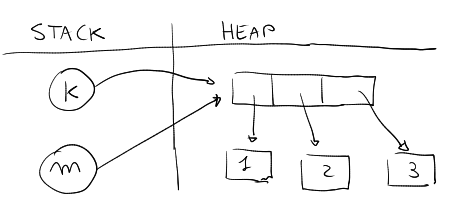

Notare che:
* `m` e `k` si riferiscono allo stesso oggetto;
* siamo stati particolarmente pedanti, e invece di mettere 1, 2 e 3 dentro la lista l, abbiamo più correttamente inserito dentro la lista dei riferimenti (frecce) a tre zone nello heap che contengono i numeri 1, 2 e 3 rispettivamente. Tale precisione è eccessiva quando si ha a che fare con i tipi immutabili, ma per una volta abbiamo voluto fare tutto con la massima precisione.

Alla riga 15 c'è la chiamata di funzione. Quello che succede è che:
* Le variabili `k` ed  `m` diventano *invisibili*: sono ancora lì, ma non vi si può accedere.
* Nello stack viene creata una nuova zona dedicata alle variabili locali: questa zona si chiama *record di attivazione*.
* Il valore dell'argomento `k` viene copiato nel paramatro `l`: per valore di `k` si intende il riferimento contenuto in `k`. Il risultato è che `l` punta allo stesso oggetto nello heap di `l` (in sostanza, è come se fosse stato eseguito l'assegnamento `l = k`).

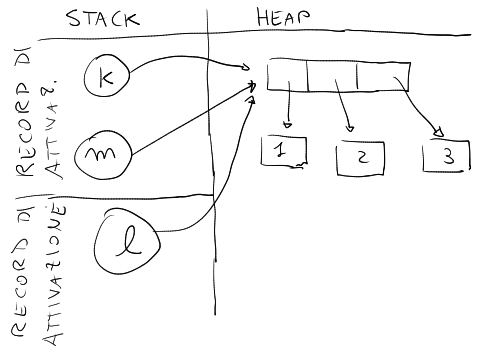

Con l'esecuzione della riga 8, viene creata una nuova variabile locale `i` che ha valore 0, e una nuova variabile locale `tmp` che ha valore uguale all'elemento in posizione `len(l) - i - 1 = 3 - 0 - 1 = 2` di `l`. Ancora una volta, non è che il valore in `l[2]` viene duplicato, ma la variabile `tmp` punta allo stesso oggetto di `l[2]`.

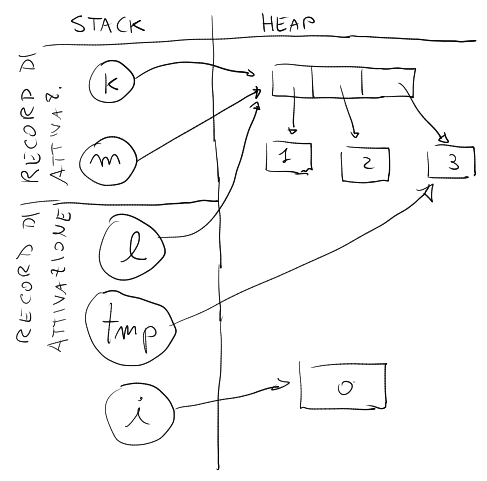

La riga 10 copia in `l[2]` il valore di `l[0]`. Ancora una volta, quello che vengono cambiati solo i rifetimenti.

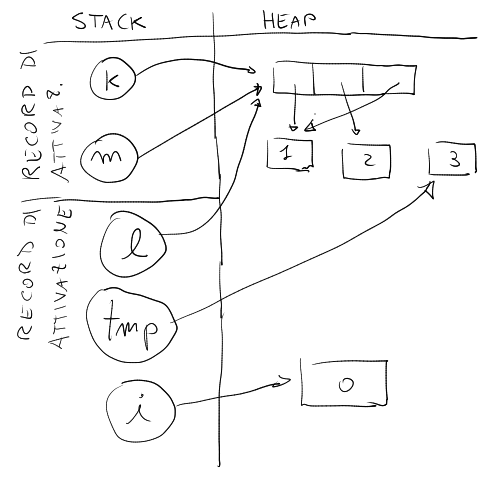

Infine, la riga 11 copia (il riferimento di) `tmp` in `l[0]`.

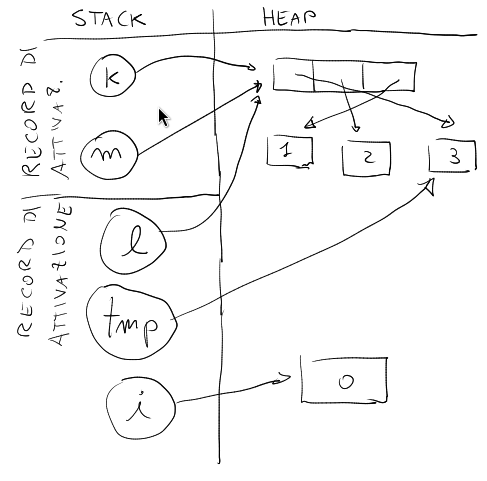

Il ciclo `for` non viene eseguito ulteriormente, e quindi si esce dalla funzione `reverse_inplace`. Il risultato è che il record di attivazione della funzione `reverse_inplace` viene distrutto, e la situazione diventa questa:

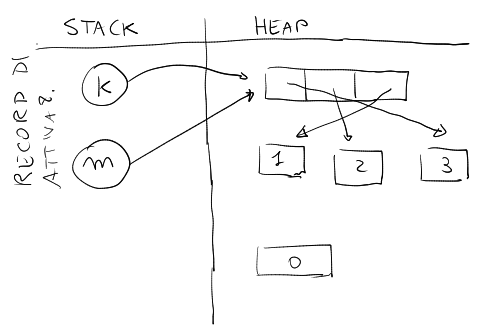

Dunque `k` ed `m` sono alias, ed entrambi uguali a `[3, 2, 1]`.

## Cancellazione di elementi quando si opera sul posto

Finché nelle operazioni che operano sul posto ci limitamo a modificare gli elementi non sorgono problemi, ma attenzione che operazioni di inserimento ed eliminazione di elementi nella lista possono essere problematici. Facciamo un esempio.

**Problema: scrivere una funzione che presa una lista di numeri interi `l`, rimuova tutti gli elementi pari.**

### Versione che restituisce una lista, partendo da lista vuota

In questa versione la funzione restituisce una nuova lista e non modifica il parametro.

In [1]:
def remove_even(l):
    """
    Restituisce una nuova lista composta dai soli elementi dispari di l.
    """
    res = []
    for x in l:
        if x % 2 != 0:
            res.append(x)
    return res

In [2]:
remove_even([1,2,4,7,11])

[1, 7, 11]

### Versione che restituisce una lista, partendo da una lista della dimensione giusta (approfondimento)

Notare che questo schema è complicato, perché non sappiamo quanto sarà lunga la lista risultato: prima bisogna contare quanti sono i valori dispari. Inoltre, quando andiamo a riempire la lista `res` con i valori di `l`, occorrerà usare due variabili indice: una che ci dice quale valore leggere di `l`, ed una in che posizione scrivere su `res`, perché a differenza degli esempi precedenti i due indici non sono sincronizzati.

In [17]:
def remove_even2(l):
    """
    Restituisce una nuova lista composta dai soli elemento dispari di l.
    """
    ## Conto quanti sono i numeri dispari.
    num_dispari = 0
    for x in l:
        if x % 2 != 0:
            num_dispari += 1
    ## Riempio res con solo i numeri dispari di l.
    res = [None] * num_dispari
    # Indice della prossima posizione da scrivere in res.
    j = 0
    # Volendo potremmo fare a meno dell'indice i (ma non di j), rimpiazzando il for...range
    # qui sotto con for che estrae direttamente dalla lista l.
    for i in range(len(l)):
        if l[i] % 2 != 0:
            res[j] = l[i]
            j += 1
    return res

In [18]:
remove_even2([1,2,4,7,11])

[1, 7, 11]

In linea di massima, l'approccio precedente è migliore. Tuttavia, la tecnica di usare due indici diversi per lettura e scrittura può risultare comoda in altri problemi.

### Versione che modifica sul posto la lista, eliminando gli elementi pari

In questo caso la funzione svolge effettivamente un lavoro diverso. 
L'idea è quella di scorrere gli elementi della lista `l` fornita come parametro, e quando si trova un elemento pari lo si cancella con il metodo `pop`.

In [17]:
def remove_even_inplace_bad(l):
    """
    Rimuove da l tutti gli elementi pari.
    """
    # Scorro gli elementi di l uno alla volta
    for i in range(len(l)):
        # Se l'elemento i è pari...
        if l[i] % 2 == 0:
            # ...lo elimino
            l.pop(i)

Ma le cose non vanno come dovrebbero.

In [18]:
l = [1, 2, 4, 7, 11]
remove_even_inplace_bad(l)

IndexError: list index out of range

L'errore si verifica perché quando usiamo `pop` la dimensione di `l` diminiusce, ma il `range` del `for` viene calcolato solo all'inizio del ciclo, non viene modificato alla fine di ogni iterazione. Dobbiamo quindi sostituire il `for` con un `while`, che ricalcola la condizione ad ogni iterazione.

In [19]:
def remove_even_inplace_bad2(l):
    """
    Rimuove da l tutti gli elementi pari.
    """
    i = 0
    while i < len(l):
        # Se l'elemento i è pari...
        if l[i] % 2 == 0:
            # ...lo elimino
            l.pop(i)
        i += 1

Ma anche così...

In [21]:
l = [1, 2, 4, 7, 11]
remove_even_inplace_bad2(l)
l

[1, 4, 7, 11]

Non si genera errore, ma il risultato è sbagliato. Il numero 4 è rimasto!! Per capire il motico, dobbiamo eseguire passo passo il programma.

Supponiamo di avere finito la prima iterazione del while, stiamo entrando nella riga 8 con i = 1. La `if` verifica che `l[i]` (ovvero 2) è effettivament pari, per cui viene eseguito il metodo pop che trasforma la lista in `[1, 4, 7, 11]`. Ma attenzione, adesso il 4 si è spostato in posizione 1 ! Si va alla riga 11, che incrementa i, per cui adesso i = 2. Si ricomincia il while ma essendo i = 2 vuol dire che viene controllato l'elemento `l[2]`, ovvero `7`. Noi abbiamo mai controllato il 4!

Eliminare un elemento con `pop` ha traslato di fatto tutti gli indici, eseguendo una specie di *avanzamento automatico* nella lista. Per controbilanciare questo avanzamento automatio, quando l'elemento i-esimo è pari *non bisogna incrementare* la variabile indice!

In [ ]:
def remove_even_inplace(l):
    """
    Rimuove da l tutti gli elementi pari.
    """
    i = 0
    while i < len(l):
        if l[i] % 2 == 0:
            l.pop(i)
        else:
            i += 1  # incremento i solo se l[i] è dispari e quindi non è stato eliminato

Yatta!

In [24]:
l = [1, 2, 4, 7, 11]
remove_even_inplace(l)
l

[1, 7, 11]

## Aggiunta di elementi quando si opera sul posto

Chiaramento un problema opposto si verifica quando funzioni che operano sul posto inseriscono elementi nella lista. Ad esempio:

**Problema: scrivere una funzione `add_ciao(l)` che prende come argomento una lista `l` e la modifica aggiungendo una stringa "ciao" dopo tutti i numeri pari.**

Ad esempio:
  * se `l` è `[1, 2, 4, 3, 6]`, dopo `add_ciao(l)` la lista `l` varrà `[1,2,"ciao",4, "ciao",3, 6, "ciao"]`.

Ovviamente è possibile anche avere la versione `add_ciao` che restituisce una nuova lista invece di modificare il parametro sul posto, ma quella non è particolarmente problematica.

Al solito, la prima versione che viene in mente non funziona.

In [2]:
def add_ciao_bad(l):
    for i in range(len(l)):
        if l[i] % 2 == 0:
            l.insert(i+1, "ciao")

In [3]:
l = [1, 2, 4, 3, 6]
add_ciao_bad(l)
l

TypeError: not all arguments converted during string formatting

Queata non funziona perché quando aggiungiamo "ciao" dopo il numero 2, la successiva iterazione del for prova a controllare se `ciao` è pari, creando ovviamente un errore. Bisogna quindi modificare il ciclo come segue:
  * trasformarlo in un while
  * quando si aggiunge "ciao" è necessario saltarlo incrementando `i` di 2 invece che di 1

In [27]:
def add_ciao(l):
    i = 0
    while i < len(l):
        if l[i] % 2 == 0:
            l.insert(i+1, "ciao")
            i += 2
        else:
            i += 1

In [28]:
l = [1, 2, 4, 3, 6]
add_ciao(l)
l

[1, 2, 'ciao', 4, 'ciao', 3, 6, 'ciao']